## 회귀
- 소득이 증가하면 소비도 증가. 어떤 변수가 다른 변수에 영향을 준다면 두 변수 사이에 선형 관계가 있다고 할 수 있음.
- 두 변수 사이에 일대일로 대응되는 확률적, 통계적 상관성을 찾는 알고리즘을 Simple Linear Regression이라고 함.
- 변수 X, Y에 대한 정보를 가지고 일차 방정식의 계수 a, b를 찾는 과정이 단순회귀분석 알고리즘

## 회귀 평가 지표
- MAE(Mean Absolute Error): 실제값과 예측값의 차이를 절대값으로 변환해 평균을 낸 것
- MSE(Mean Squared Error): 실제값과 예측값의 차이를 제곱해 평균을 낸 것
- RMSE(Root Mean Squared Error): MSE에 루트를 씌운 것. 실제 오류 평균보다 커지는 것을 보정.
- R Square: 분산 기반으로 예측 성능을 평가. 실제값의 분산 대비 예측값의 분산 비율을 지표로 함.
    - 1에 가까울수록 예측 정확도가 높음. 예측값 Variance ÷ 실제값 Variance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('../m2_분석라이브러리활용/pandas/dataset/auto-mpg.xlsx')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
df.horsepower.unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160, 95, 97, 85,
       88, 46, 87, 90, 113, 200, 210, 193, '?', 100, 105, 175, 153, 180,
       110, 72, 86, 70, 76, 65, 69, 60, 80, 54, 208, 155, 112, 92, 145,
       137, 158, 167, 94, 107, 230, 49, 75, 91, 122, 67, 83, 78, 52, 61,
       93, 148, 129, 96, 71, 98, 115, 53, 81, 79, 120, 152, 102, 108, 68,
       58, 149, 89, 63, 48, 66, 139, 103, 125, 133, 138, 135, 142, 77, 62,
       132, 84, 64, 74, 116, 82], dtype=object)

In [4]:
df.horsepower[df.horsepower=='?']=np.nan
df.horsepower = df.horsepower.astype(float)
df.dropna(subset=['horsepower'],axis=0,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [5]:
df.weight

0      3504
1      3693
2      3436
3      3433
4      3449
       ... 
393    2790
394    2130
395    2295
396    2625
397    2720
Name: weight, Length: 392, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

X = df[['weight']]
y = df[['mpg']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

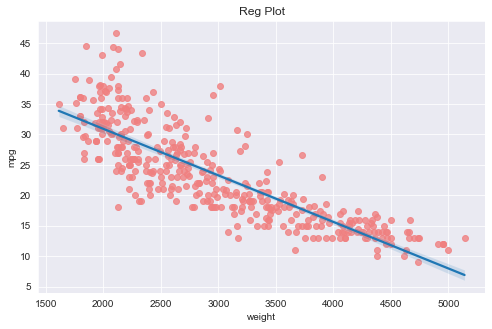

In [7]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(1,1,figsize=(8,5))
sns.regplot(ax=axes, x='weight', y='mpg', data=df, scatter_kws={'color':'lightcoral'})
plt.title('Reg Plot')
plt.show()
plt.close()

In [8]:
X_train

,weight
311,2120
106,4499
332,1845
216,2045
349,1985
...,...
271,2745
341,2725
92,4363
81,2288


In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

In [10]:
print(f'기울기: {lr.coef_}, 절편: {lr.intercept_}')

기울기: [[-0.00762163]], 절편: [45.9712177]


In [11]:
# 이 친구들은 y 예측 데이터와 예측값
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
R = r2_score(y_test, pred)
print(f'MSE: {mse.round(4)}, RMSE: {rmse.round(4)}, R2 Score: {R.round(4)}')

MSE: 22.169, RMSE: 4.7084, R2 Score: 0.6411


In [12]:
display(y_test[:5], pred.round(4)[:5])

,mpg
240,30.5
390,32.0
391,36.0
236,25.5
222,17.0


array([[29.2799],
       [25.6596],
       [27.908 ],
       [24.9736],
       [15.0274]])

<AxesSubplot:ylabel='Density'>

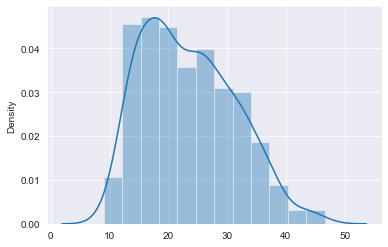

In [13]:
sns.distplot(y, kde=True)

<AxesSubplot:ylabel='Density'>

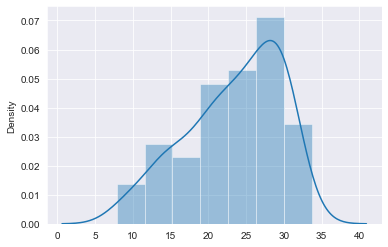

In [14]:
sns.distplot(pred, kde=True)

<AxesSubplot:ylabel='Density'>

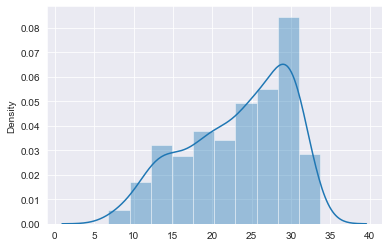

In [15]:
y_hat = lr.predict(X)
sns.distplot(y_hat, kde=True)

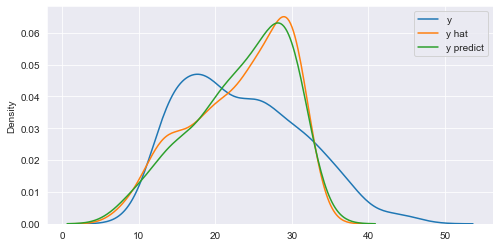

In [16]:
plt.figure(figsize=(8,4))
ax1 = sns.distplot(y,hist=False, label='y')
ax2 = sns.distplot(y_hat, hist=False, label='y hat')
ax3 = sns.distplot(pred, hist=False, label = 'y predict')
plt.legend()
plt.show()

## 다항 회귀분석
- 직선보다 곡선으로 설명하는 것이 더 적합할 경우 다항 함수를 사용하면 복잡한 곡선 형태의 회귀선을 표현할 수 있음.
- 2차 함수 이상의 다항 함수를 이용하여 두 변수 간의 선형 관계를 설명하는 알고리즘
- 다항 회귀도 선형 회귀이다. 선형/비선형 회귀를 나누는 기준은 회귀계수가 선형/비선형인지에 따르며,  
독립변수의 선형/비선형 여부와는 관계 없다.

In [17]:
X_train.shape

(274, 1)

In [18]:
# 다항식 변환
from sklearn.preprocessing import PolynomialFeatures

In [19]:
poly = PolynomialFeatures(degree=2) # 2차 방정식 갈 거예요!
X_train_poly = poly.fit_transform(X_train) # 1차항 X_train을 2차항으로
print(X_train.shape, X_train_poly.shape)

(274, 1) (274, 3)


In [20]:
X_train_poly[:5]
# 절편, x, x^2

array([[1.0000000e+00, 2.1200000e+03, 4.4944000e+06],
       [1.0000000e+00, 4.4990000e+03, 2.0241001e+07],
       [1.0000000e+00, 1.8450000e+03, 3.4040250e+06],
       [1.0000000e+00, 2.0450000e+03, 4.1820250e+06],
       [1.0000000e+00, 1.9850000e+03, 3.9402250e+06]])

In [21]:
# 차수 확인 - 절편, x, x^2
poly.get_feature_names()

['1', 'x0', 'x0^2']

In [22]:
# poly를 위한 linear regression 객체를 새로 만들장
pr = LinearRegression()
pr.fit(X_train_poly, y_train) # 다항식 변환한 거 넣어서 학습

X_test_poly = poly.fit_transform(X_test) # 테스트 데이터도 다항식 변환
polypred = pr.predict(X_test_poly)
mean_squared_error(y_test, polypred)
r2 = r2_score(y_test, polypred)
r2
# 아니 pr.score로 하면 안 나오고 r2_score로 하면 나오는 건 뭐임...?

0.6368479947376219

In [23]:
display(y_test[:5], polypred.round(4)[:5])

,mpg
240,30.5
390,32.0
391,36.0
236,25.5
222,17.0


array([[29.7291],
       [24.63  ],
       [27.6887],
       [23.7674],
       [14.9663]])

In [24]:
print(f'기울기(??): {pr.coef_.round(4)}, 절편: {pr.intercept_.round(4)}')

기울기(??): [[ 0.     -0.0206  0.    ]], 절편: [65.1227]


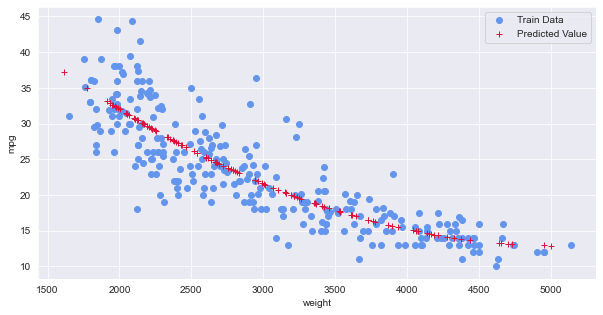

In [25]:
y_hat_test = pr.predict(X_test_poly)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train, y_train, 'o', label = 'Train Data', color='cornflowerblue')
ax.plot(X_test, y_hat_test, 'r+', label = 'Predicted Value', color = 'crimson')
ax.legend(loc = 'best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()
# 빨간 점을 보면 알겠지만 야악간 2차 방정식 해 곡선의 모양을 띄고 있다.

In [26]:
# [과제] X 데이터를 X_poly 데이터셋으로 변환하여 2차함수로 만들어진 데이터셋을 예측하고 시각화하세요
import numpy as np
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)
display(X[:3],y[:3])

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365]])

array([[1.61761105],
       [8.06185944],
       [4.45250583]])

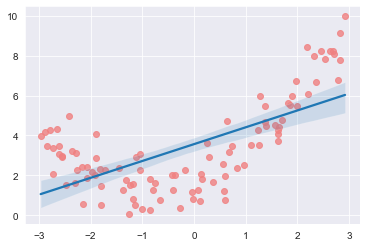

In [27]:
sns.regplot(X,y, scatter_kws={'color':'lightcoral'})
plt.show()

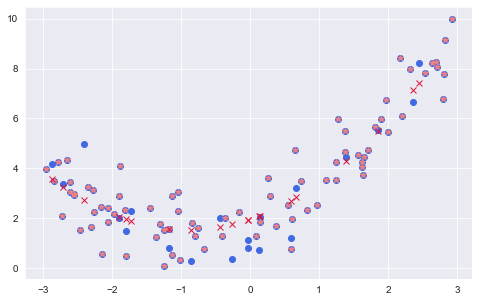

In [28]:
poly = PolynomialFeatures(degree=2) # 2차함수니까 degree도 2

# 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 4)

# 2차 다항식으로 변환
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

# 선형회귀로 학습해 봅시다
lr = LinearRegression()
lr.fit(X_train_poly, y_train)
pred = lr.predict(X_test_poly)

# 시각화
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax1 = ax.plot(X,y, 'o', color='royalblue')
ax2 = ax.plot(X_train, y_train, '*', color='lightcoral')
ax3 = ax.plot(X_test, pred, 'x', color='crimson')
plt.show()

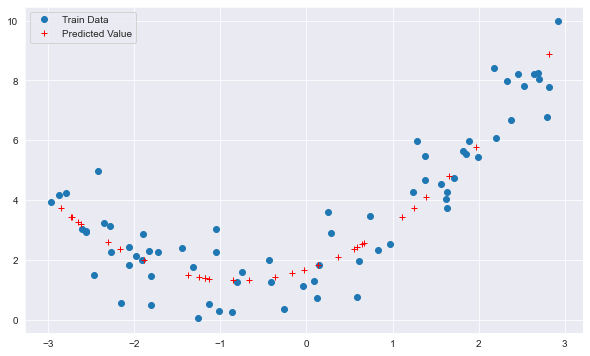

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 11)
# 2차 다항식으로 바꿈
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
# 훈련 및 학습
lr = LinearRegression()
lr.fit(X_train_poly,y_train)
y_preds = lr.predict(X_test_poly)
# 시각화
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train,y_train,'o',label='Train Data')
ax.plot(X_test,y_preds,'r+', label='Predicted Value')
ax.legend(loc='best')
plt.show()
plt.close()


In [30]:
df = df[['mpg','cylinders','horsepower','weight']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         392 non-null    float64
 1   cylinders   392 non-null    int64  
 2   horsepower  392 non-null    float64
 3   weight      392 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 15.3 KB


In [31]:
df.to_pickle('auto-mpg.pkl')

In [32]:
df = pd.read_pickle('auto-mpg.pkl')
df.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504
1,15.0,8,165.0,3693
2,18.0,8,150.0,3436
3,16.0,8,150.0,3433
4,17.0,8,140.0,3449


In [33]:
X = df.drop('mpg', axis=1)
y = df.mpg
X.shape

(392, 3)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 10)
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

In [35]:
R = lr.score(X_test, y_test)
R.round(4)

0.6939

In [36]:
# mse, rmse, r2, 기울기, 절편
MSE = mean_squared_error(y_test, pred).round(4)
RMSE = np.sqrt(MSE)
R = r2_score(y_test, pred).round(4)
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')
print(f'R Square: {R}')
print(f'기울기: {lr.coef_.round(4)}, 절편: {lr.intercept_.round(4)}')

MSE: 17.3301
RMSE: 4.162943670048875
R Square: 0.6939
기울기: [-0.6069 -0.0371 -0.0052], 절편: 46.4144


In [37]:
y_hat = lr.predict(X)

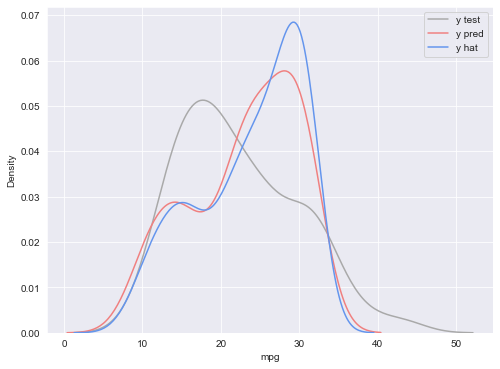

In [38]:
# [과제] y_test, y_hat을 하나의 그래프로 비교하여 시각화
plt.figure(figsize=(8,6))
ax1 = sns.distplot(y_test,hist=False, color='darkgray',label='y test')
ax2 = sns.distplot(pred,hist=False, color='lightcoral',label='y pred')
ax3 = sns.distplot(y_hat,hist=False, color='cornflowerblue',label='y hat')
plt.legend()
plt.show()

In [14]:
from sklearn.datasets import load_boston
import warnings
import pandas as pd
import numpy as np
warnings.filterwarnings('ignore')

boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


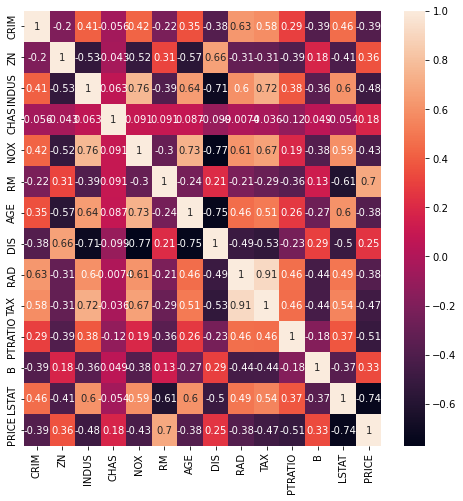

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
heat = boston_df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(heat, annot=True)
plt.show()

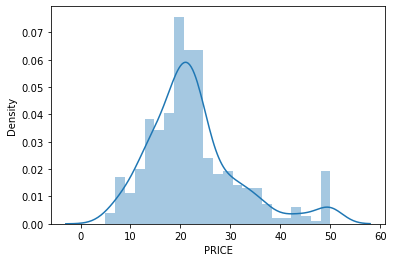

In [16]:
sns.distplot(boston_df.PRICE)
plt.show()

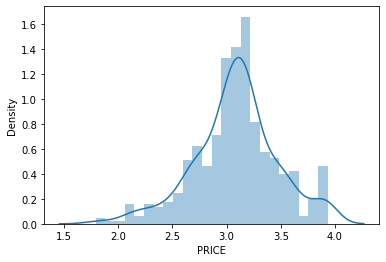

In [17]:
# 왜곡된 수치를 로그 변환을 통해 완화해 보자
y_log = np.log1p(boston_df.PRICE)
sns.distplot(y_log)
plt.show()

In [36]:
# 핵심 변수 선택 및 로그 변환 후 모델링, 평가
from sklearn.model_selection import train_test_split

X = boston_df[['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']]
y = boston_df.PRICE
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 1)

In [37]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

In [38]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
R = r2_score(y_test, pred)
print(f'MSE: {mse.round(4)}, RMSE: {rmse.round(4)}, R2 Score: {R.round(4)}')

MSE: 25.934, RMSE: 5.0925, R2 Score: 0.717


In [39]:
# 회귀 계수, 절편값
print(f'회귀계수: {np.round(lr.coef_,2)}, y 절편: {lr.intercept_:.4f}')

회귀계수: [  3.17  -0.     0.07 -14.71   0.03  -1.19  -0.64   0.09], y 절편: 36.9033


#### 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷
- 회귀 모델은 적절히 데이터에 적합하면서도 회귀 계수가 기하급수적으로 커지는 것을 제어할 필요가 있음
- 선형 모형의 비용함수는 RSS(실제 값과 예측값의 차이)를 최소화하는 것만 고려한 결과 테스트 데이터 세트 예측 성능 저하 초래
- RSS 최소화 방법과 과적합을 방지하기 위해 회귀 계수 값이 커지지 않도록 하는 방법이 서로 균형을 이루게 해야 함(최적모델을 위한 Cost 함수 구성요소 = 학습데이터 잔차 오류 최소화 + 회귀계수 크기 제어)
- 회귀 계수 값의 크기를 조절하기 위하여 비용 함수에 알파 값으로 패널티를 부여해 과적합을 개선하는 방식을 규제라고 함
- alpha값을 크게 하면 비용 함수는 회귀 계수 W의 값을 작게 해 과적합을 개선할 수 있으며 alpha값을 작게 하면 회귀 계수 W의 값이 커져도 어느정도 상쇄가 가능하므로 학습데이터 적합을 더 개선
- 비용함수에 alpha값으로 패널티를 부여해 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 방식을 규제라고 한다.
- 규제는 크게 L2 방식과 L1 방식으로 구분되며 전자를 적용한 회귀를 릿지, 후자를 적용한 것이 라쏘임
- L2는 W의 제곱에 패널티를 부여하며 L1은 W의 절댓값에 패널티 부여
- 엘리스틱넷 회귀는 L2 규제와 L1 규제를 결합한 회귀


In [41]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [44]:
ridge = Ridge(alpha=10)
neg_mse_score = cross_val_score(ridge, X, y, scoring='neg_mean_squared_error', cv=5)
rmse_score = np.sqrt(-1*neg_mse_score)
avg_rmse = np.mean(rmse_score)
print(f'RMSE Score: {np.round(rmse_score, 3)}')
print(f'평균 RMSE: {avg_rmse:.3f}')

RMSE Score: [3.216 5.405 6.227 9.091 5.8  ]
평균 RMSE: 5.948


In [47]:
alphas = [0, 0.1, 1, 10, 100]
for a in alphas:
    ridge = Ridge(alpha=a)
    neg_mse_score = cross_val_score(ridge, X, y, scoring='neg_mean_squared_error', cv=5)
    rmse_score = np.sqrt(-1*neg_mse_score)
    avg_rmse = np.mean(rmse_score)
    print(f'RMSE Score: {np.round(rmse_score, 3)}')
    print(f'평균 RMSE: {avg_rmse:.3f}\n')

RMSE Score: [3.403 5.226 6.225 9.466 5.937]
평균 RMSE: 6.051

RMSE Score: [3.382 5.23  6.216 9.46  5.934]
평균 RMSE: 6.044

RMSE Score: [3.282 5.273 6.176 9.418 5.918]
평균 RMSE: 6.013

RMSE Score: [3.216 5.405 6.227 9.091 5.8  ]
평균 RMSE: 5.948

RMSE Score: [3.516 5.747 6.751 7.802 5.239]
평균 RMSE: 5.811



In [49]:
# [연습문제] 상기의 경우 alpha 값이 증가하면 회귀계수가 지속적으로 작아지는 것을 시각화하여 설명하세요.
alphas = [0, 0.1, 1, 10, 100]
ridge.coef_

AttributeError: 'Ridge' object has no attribute 'coef_'

##### [과제] 모델 이름과 alpha 리스트를 대입하면 각 alpha 별로 rmse를 구해주는 사용자 함수를 작성하여 아래를 수행하세요.

- lasso, [0.07, 0.1, 0.5, 1.3]
- elsaticnet, [0.07, 0.1, 0.5, 1.3]